In [1]:
#To import all required modules for HW3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import SpectralEmbedding
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import scipy.io
import numpy as np
from sklearn import metrics
from sklearn.cluster import SpectralClustering
>>> from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#To load and import data from the "faces-ids-n6680-m417-20x20.mat" mat file
#I used scipy library to load the data

dataset = scipy.io.loadmat('dataset/faces-ids-n6680-m417-20x20.mat')

#To get faces and faces id and store them in two different varaibles
faces = dataset['faces']

faces_ids = dataset['ids']
target = dataset['ids']
#convert data to float and scale values between 0 and 1
faces = faces.astype('float')

#scale data
faces /=255.0

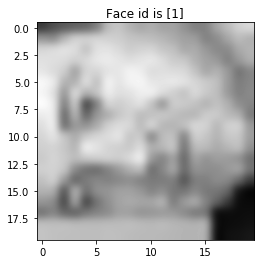

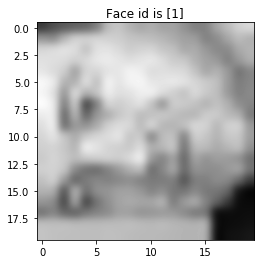

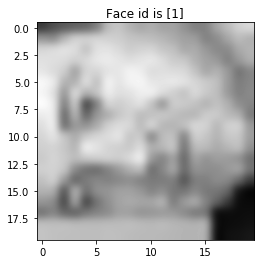

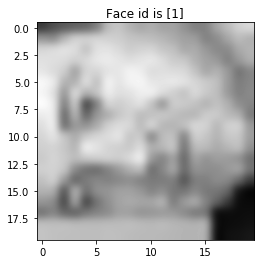

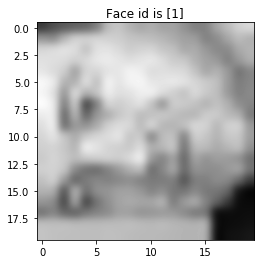

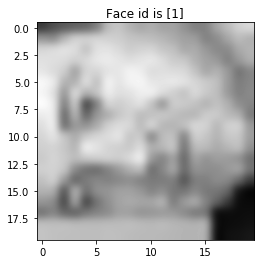

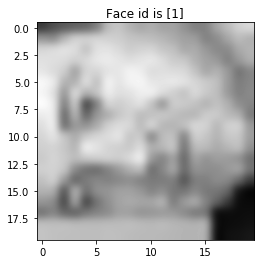

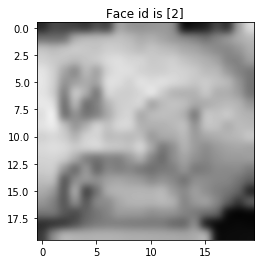

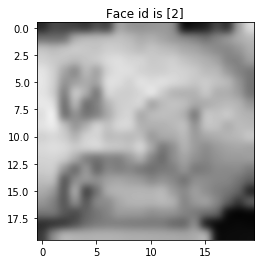

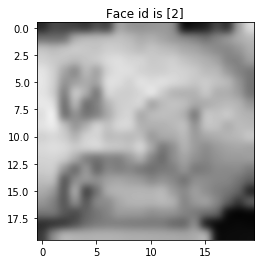

In [3]:
#To show first 10 faces in the data set and it is label

for ids in faces_ids[:10]:
    
    plt.imshow(faces[ids].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(ids), size=12)
    plt.show()

In [4]:
# To split data set into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(faces, faces_ids, test_size=0.10, random_state=42)


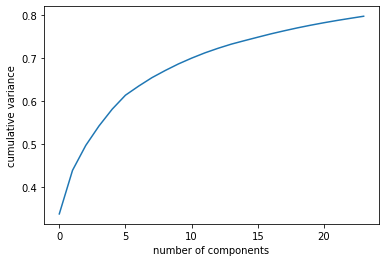

In [6]:
# Compute a PCA (eigenfaces) on the face dataset
n_components = 24
h = 20
w = 20

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

# To Project the input data on the eigenfaces
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#To compute Graph Laplacian embedding model after Eigenface projection (A0):
graph_Laplacian_embedding_model = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', gamma=None, random_state=None, eigen_solver=None, n_neighbors=None, n_jobs=None).fit(X_train_pca)
X_train_glem = graph_Laplacian_embedding_model.fit_transform(X_train_pca)
X_test_glem = graph_Laplacian_embedding_model.fit_transform(X_test_pca)



#To plot cumulative variance corrsponding to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()


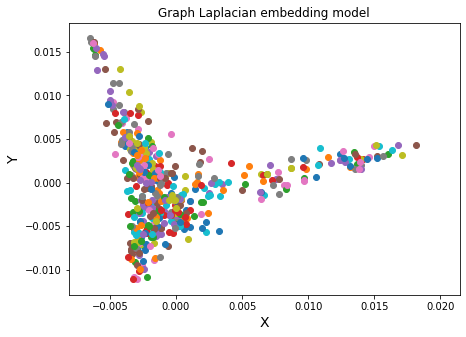

In [7]:
#To plot eigenface model 
first_xglem = X_test_glem[:500, :1]
second_yglem = X_test_glem[:500, 1:2]
faces_labels=y_test[:500]
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for label in np.unique(faces_labels):
 label_id=np.where(faces_labels==label)
 ax.scatter(first_xglem[label_id],second_yglem[label_id])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.title("Graph Laplacian embedding model")
plt.show()


In [38]:
#To print the affinity matrix
print(graph_Laplacian_embedding_model._get_affinity_matrix(X_test_pca, y_test))



(0, 522)	0.5
  (0, 513)	0.5
  (0, 429)	0.5
  (0, 318)	0.5
  (0, 111)	0.5
  (0, 262)	0.5
  (0, 142)	0.5
  (0, 326)	0.5
  (0, 564)	0.5
  (0, 558)	0.5
  (0, 252)	0.5
  (0, 128)	0.5
  (0, 351)	0.5
  (0, 91)	0.5
  (0, 393)	0.5
  (0, 175)	0.5
  (0, 379)	1.0
  (0, 337)	0.5
  (0, 65)	0.5
  (0, 90)	0.5
  (0, 53)	0.5
  (0, 35)	0.5
  (0, 15)	0.5
  (0, 230)	0.5
  (0, 7)	0.5
  :	:
  (667, 101)	0.5
  (667, 141)	1.0
  (667, 511)	0.5
  (667, 524)	0.5
  (667, 462)	0.5
  (667, 174)	0.5
  (667, 294)	0.5
  (667, 227)	0.5
  (667, 325)	1.0
  (667, 280)	0.5
  (667, 146)	1.0
  (667, 8)	0.5
  (667, 43)	1.0
  (667, 74)	1.0
  (667, 33)	1.0
  (667, 614)	1.0
  (667, 553)	1.0
  (667, 300)	1.0
  (667, 652)	1.0
  (667, 356)	1.0
  (667, 474)	1.0
  (667, 606)	1.0
  (667, 468)	1.0
  (667, 333)	1.0
  (667, 667)	1.0


In [59]:


model = SpectralClustering(n_clusters=417, eigen_solver=None, n_components=24, random_state=None, n_init=10, gamma=1.0, affinity='nearest_neighbors', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(X_train_glem, y_train)

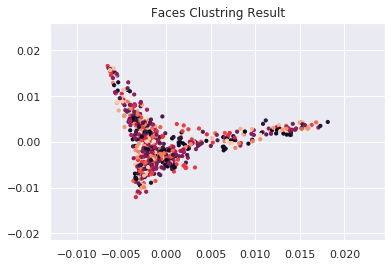

In [71]:
plt.title(f'Faces Clustring Result')
plt.scatter(X_test_glem[:, 0], X_test_glem[:, 1], s=10, c = y_pred);